## import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

fuel_econ = pd.read_csv('./fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## two numeric

### Scatter plot

#### plt.scatter (2 numeric)

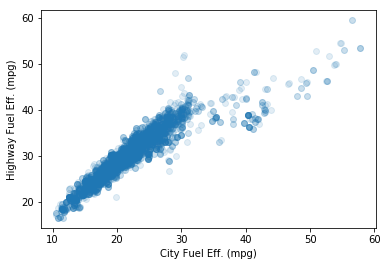

In [2]:
plt.scatter(data = fuel_econ, x = 'city', y = 'highway', alpha = 1/8)
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

#### sb.regplot (2 numeric)

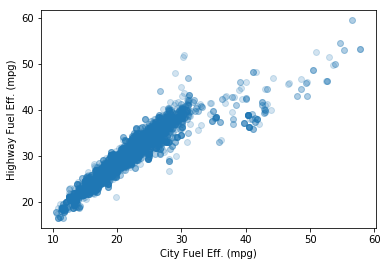

In [3]:
sb.regplot(data=fuel_econ, x='city', y='highway', fit_reg=False,
          scatter_kws={'alpha': 0.2})
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

### Heat Maps

#### Heat maps (2 numeric)

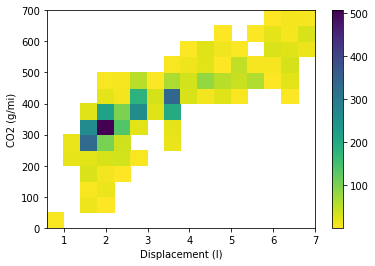

In [4]:
bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.4, 0.4)
bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y], 
           cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)');

#### Heat maps with annotations

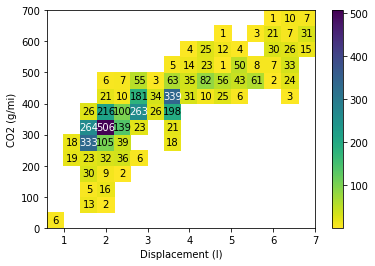

In [5]:
bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.4, 0.4)
bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y], 
           cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)')

counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 250: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.2, bins_y[j]+25, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.2, bins_y[j]+25, int(c),
                     ha = 'center', va = 'center', color = 'black')

### Line plot

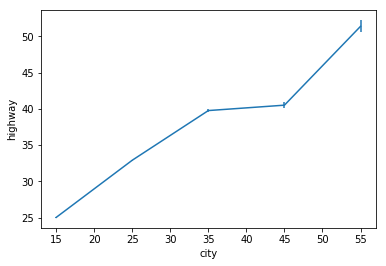

In [6]:
# set bin edges, compute centers
bin_size = 10.0
xbin_edges = np.arange(10.0, fuel_econ['city'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(fuel_econ['city'], xbin_edges, right=False, include_lowest=True)
y_means = fuel_econ['highway'].groupby(data_xbins).mean()
y_sems = fuel_econ['highway'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x=xbin_centers, y=y_means.values, yerr=y_sems.values)
plt.xlabel('city')
plt.ylabel('highway');

## One numeric, One categorical

### Violin plots

#### Basic form

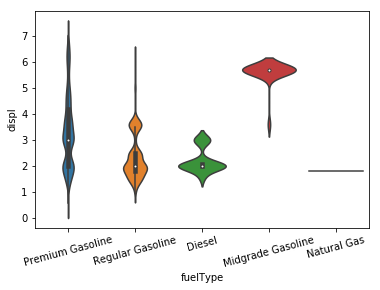

In [7]:
sb.violinplot(data=fuel_econ, x='fuelType', y='displ')
plt.xticks(rotation=15);

#### transfrom the data type to CategoricalDtype

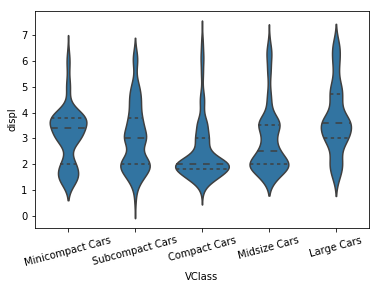

In [8]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else: # pre-v0.21
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered=True,
                                                     categories=sedan_classes)

base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='displ', 
              color=base_color, inner='quartile')
plt.xticks(rotation=15);

### Boxplot

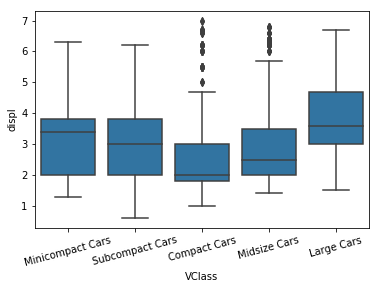

In [9]:
sb.boxplot(data=fuel_econ, x='VClass', y='displ', color=base_color)
plt.xticks(rotation=15);

## Two categorical

### Clustered bar charts

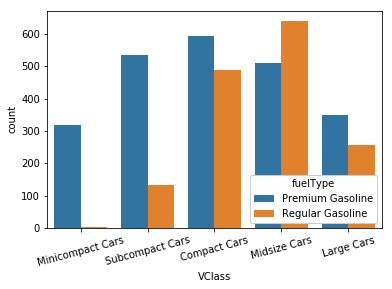

In [10]:
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

ax = sb.countplot(data=fuel_econ_sub, x='VClass', hue='fuelType')
ax.legend(loc=4, framealpha=1, title='fuelType') # lower right, no transparency
plt.xticks(rotation=15);

### Heat map (2 categorical)

In [11]:
type_counts = fuel_econ_sub.groupby(['VClass', 'fuelType']).size()
type_counts

VClass            fuelType        
Minicompact Cars  Premium Gasoline    318
                  Regular Gasoline      3
Subcompact Cars   Premium Gasoline    534
                  Regular Gasoline    132
Compact Cars      Premium Gasoline    593
                  Regular Gasoline    490
Midsize Cars      Premium Gasoline    509
                  Regular Gasoline    640
Large Cars        Premium Gasoline    348
                  Regular Gasoline    256
dtype: int64

In [12]:
type_counts = type_counts.reset_index(name = 'count')
type_counts

,VClass,fuelType,count
0,Minicompact Cars,Premium Gasoline,318
1,Minicompact Cars,Regular Gasoline,3
2,Subcompact Cars,Premium Gasoline,534
3,Subcompact Cars,Regular Gasoline,132
4,Compact Cars,Premium Gasoline,593
5,Compact Cars,Regular Gasoline,490
6,Midsize Cars,Premium Gasoline,509
7,Midsize Cars,Regular Gasoline,640
8,Large Cars,Premium Gasoline,348
9,Large Cars,Regular Gasoline,256


In [13]:
type_counts = type_counts.pivot(index='fuelType', columns='VClass', values='count')
type_counts

VClass,Minicompact Cars,Subcompact Cars,Compact Cars,Midsize Cars,Large Cars
fuelType,,,,,
Premium Gasoline,318,534,593,509,348
Regular Gasoline,3,132,490,640,256


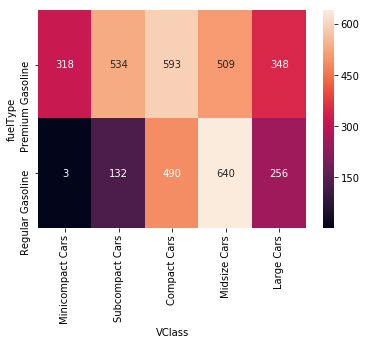

In [14]:
sb.heatmap(type_counts, annot = True, fmt = 'd');

## Faceting

In [15]:
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

print(make_frequency)
print('----------------------')
print(idx)

BMW                  523
Mercedes-Benz        269
Porsche              235
Ford                 218
Chevrolet            212
MINI                 201
Audi                 201
Volkswagen           174
Hyundai              158
Dodge                140
Lexus                125
Kia                  124
Cadillac             118
Toyota               116
Infiniti             108
Honda                101
Jaguar                98
Mazda                 87
Nissan                71
Buick                 66
Subaru                60
Chrysler              58
Lincoln               52
Volvo                 50
Acura                 46
Bentley               45
Mitsubishi            44
Rolls-Royce           42
Maserati              39
Scion                 27
Fiat                  26
Ferrari               23
Genesis               17
Aston Martin          15
Suzuki                13
Lotus                 10
Roush Performance     10
Alfa Romeo             6
Karma                  1
Name: make, dtype: int64


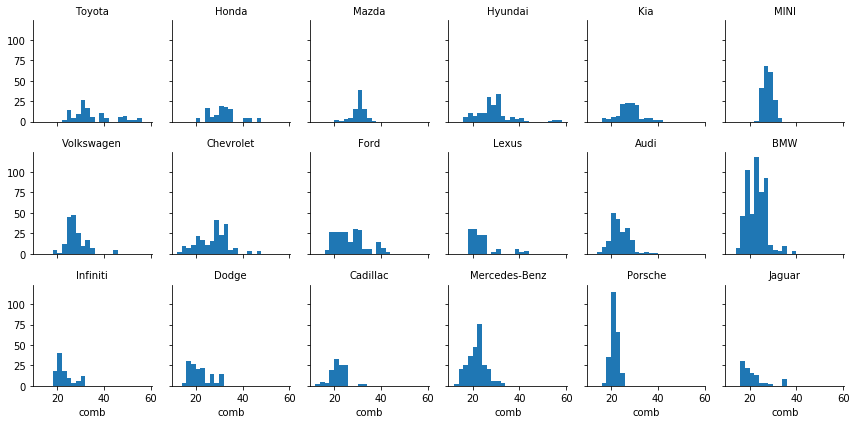

In [16]:
most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending=False).index

# plotting
g = sb.FacetGrid(data=fuel_econ_sub, col='make', col_wrap=6, height=2,
                 col_order=comb_order)
g.map(plt.hist, 'comb', bins=np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}');

In [17]:
most_makes

Index(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'MINI', 'Audi',
       'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia', 'Cadillac', 'Toyota',
       'Infiniti', 'Honda', 'Jaguar', 'Mazda'],
      dtype='object')

In [18]:
make_means.head()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
make,,,,,,,,,,,,,,
Audi,35835.398010,2015.532338,5.512438,2.751741,25.781095,48.786070,20.426925,25.652045,29.389482,40.513205,23.639240,384.676617,5.432836,5.402985
BMW,35953.648184,2015.493308,5.973231,3.083748,35.441683,55.269598,19.862614,25.157074,28.649093,40.927519,23.004798,394.885277,5.221797,5.214149
Cadillac,36052.110169,2015.584746,5.474576,3.243220,24.398305,93.983051,18.845043,24.039474,26.939762,38.256114,21.773203,408.686441,4.915254,4.932203
Chevrolet,35903.301887,2015.476415,4.886792,2.599528,19.740566,67.037736,23.955976,31.080558,33.017294,47.937314,27.224809,343.957547,6.386792,6.353774
Dodge,35907.100000,2015.278571,6.285714,4.225714,32.228571,41.035714,18.516134,23.345414,27.948863,39.730484,21.812190,424.164286,4.878571,4.878571
